# Objetivo do Projeto

Analisar a base dados Automobile com o fim de prever preços de veículos através de análise de dados e algoritmo de Machine Learning. 

# Coletando a Base de Dados
- Origem: https://archive.ics.uci.edu/dataset/10/automobile

# Bibliotecas Necessárias Para Aplicação

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
dataset_carros = pd.read_csv('/home/yurilima/Downloads/automobile/imports-85.data', sep=',')

In [3]:
dataset_carros.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


# Tratando os Dados Para a Análise

- Editando a lista de colunas para melhor entendimento dos dados e traduzindo para o Português. 

In [4]:
colunas_portugues = [
    "marcas",
    "níveis de perda normalizados",
    "fabricante",
    "tipo de combustível",
    "aspiração do motor",
    "número de portas",
    "estilo do carro",
    "tração",
    "localização do motor",
    "distância entre eixos",
    "comprimento",
    "largura",
    "altura",
    "peso do carro",
    "tipo de motor",
    "número de cilindros",
    "tamanho do motor",
    "sistema de combustível",
    "diâmetro do cilindro",
    "curso do pistão",
    "taxa de compressão",
    "potência do motor",
    "rpm máximo",
    "consumo de combustível na cidade",
    "consumo de combustível na estrada",
    "preço"
]

In [5]:
dataset_carros.columns = colunas_portugues

In [6]:
dataset_carros.head()

,marcas,níveis de perda normalizados,fabricante,tipo de combustível,aspiração do motor,número de portas,estilo do carro,tração,localização do motor,distância entre eixos,...,tamanho do motor,sistema de combustível,diâmetro do cilindro,curso do pistão,taxa de compressão,potência do motor,rpm máximo,consumo de combustível na cidade,consumo de combustível na estrada,preço
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


- Foi notado que na base de dados existem alguns valores representados pelo caracter <strong>'?'</strong>, então que seja possível executar interpolação para os dados numéricos todos os <strong>'?'</strong> foram substituídos por valores nulos nativos da biblioteca Numpy. 
As colunas afetadas pelo código foram:<br>
<table>
  <tr>
    <th>níveis de perda normalizados</th>
    <th>número de portas</th>
    <th>diâmetro do cilindro</th>
    <th>curso do pistão</th>
    <th>potência do motor</th>
    <th>rpm máximo</th>
    <th>preço</th>
  </tr>
</table>

In [7]:
def to_nan(x):
    if x == '?':
        return np.nan
    else:
        return x

for coluna in dataset_carros:
    dataset_carros[coluna] = dataset_carros[coluna].apply(to_nan)

dataset_carros.head()

,marcas,níveis de perda normalizados,fabricante,tipo de combustível,aspiração do motor,número de portas,estilo do carro,tração,localização do motor,distância entre eixos,...,tamanho do motor,sistema de combustível,diâmetro do cilindro,curso do pistão,taxa de compressão,potência do motor,rpm máximo,consumo de combustível na cidade,consumo de combustível na estrada,preço
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


### Tratando Valores Nulos

De acordo com as informações obtidas do dataset_carros, é notável que a maior parte dos dados faltantes está no campo de **níveis de perda normalizadas**, totalizando 40 dados nulos.

In [8]:
dataset_carros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   marcas                             204 non-null    int64  
 1   níveis de perda normalizados       164 non-null    object 
 2   fabricante                         204 non-null    object 
 3   tipo de combustível                204 non-null    object 
 4   aspiração do motor                 204 non-null    object 
 5   número de portas                   202 non-null    object 
 6   estilo do carro                    204 non-null    object 
 7   tração                             204 non-null    object 
 8   localização do motor               204 non-null    object 
 9   distância entre eixos              204 non-null    float64
 10  comprimento                        204 non-null    float64
 11  largura                            204 non-null    float64

E no que se trata dos outros valores faltantes em média, existe 3, contudo, essas linhas serão removidas, pois não terá grande impacto na integridade dos dados. 

In [9]:
valores_nulos = 0
colunas_com_valores_nulos = 0
for coluna in dataset_carros:
    nulos = dataset_carros[coluna].isnull().sum()
    if nulos > 0 and nulos != 40:
        valores_nulos += nulos
        colunas_com_valores_nulos += 1
print(f'A média valores nulos entre as colunas que possuem essa caracteristica, '
      f'menos na de níveis de perda normalizados é de: {valores_nulos/colunas_com_valores_nulos}')


A média valores nulos entre as colunas que possuem essa caracteristica, menos na de níveis de perda normalizados é de: 3.0


Para a coluna de níveis de perda normalizados a estrategia utilizada para preenchimento dos dados vai ser feita analisando qual parametro descritivo dessa série de dados vai cumprir essa tarefa sem comprometer os dados. Contudo, é necessario mudar o tipo de dado da série para float com o objetivo de melhorar análise.

In [10]:
dataset_carros['níveis de perda normalizados'] = dataset_carros['níveis de perda normalizados'].astype('float')

Analisando Gráficamente os dados:

In [11]:
perdas_normalizada = dataset_carros['níveis de perda normalizados']
perdas_normalizada.describe()

count    164.000000
mean     122.000000
std       35.442168
min       65.000000
25%       94.000000
50%      115.000000
75%      150.000000
max      256.000000
Name: níveis de perda normalizados, dtype: float64

Serão utilizados para Análise gráfica as estatísitcas:
<table>
  <tr>
    <th>Médiath>
    <th>Mediaana</th>
    <th>Quartis 25%,50%,75%</th>
  </tr>
</table>

[Text(0.5, 1.0, 'Preenchendo com a Quartil 75%'),
 Text(0.5, 0, 'Perdas Normalizadas')]

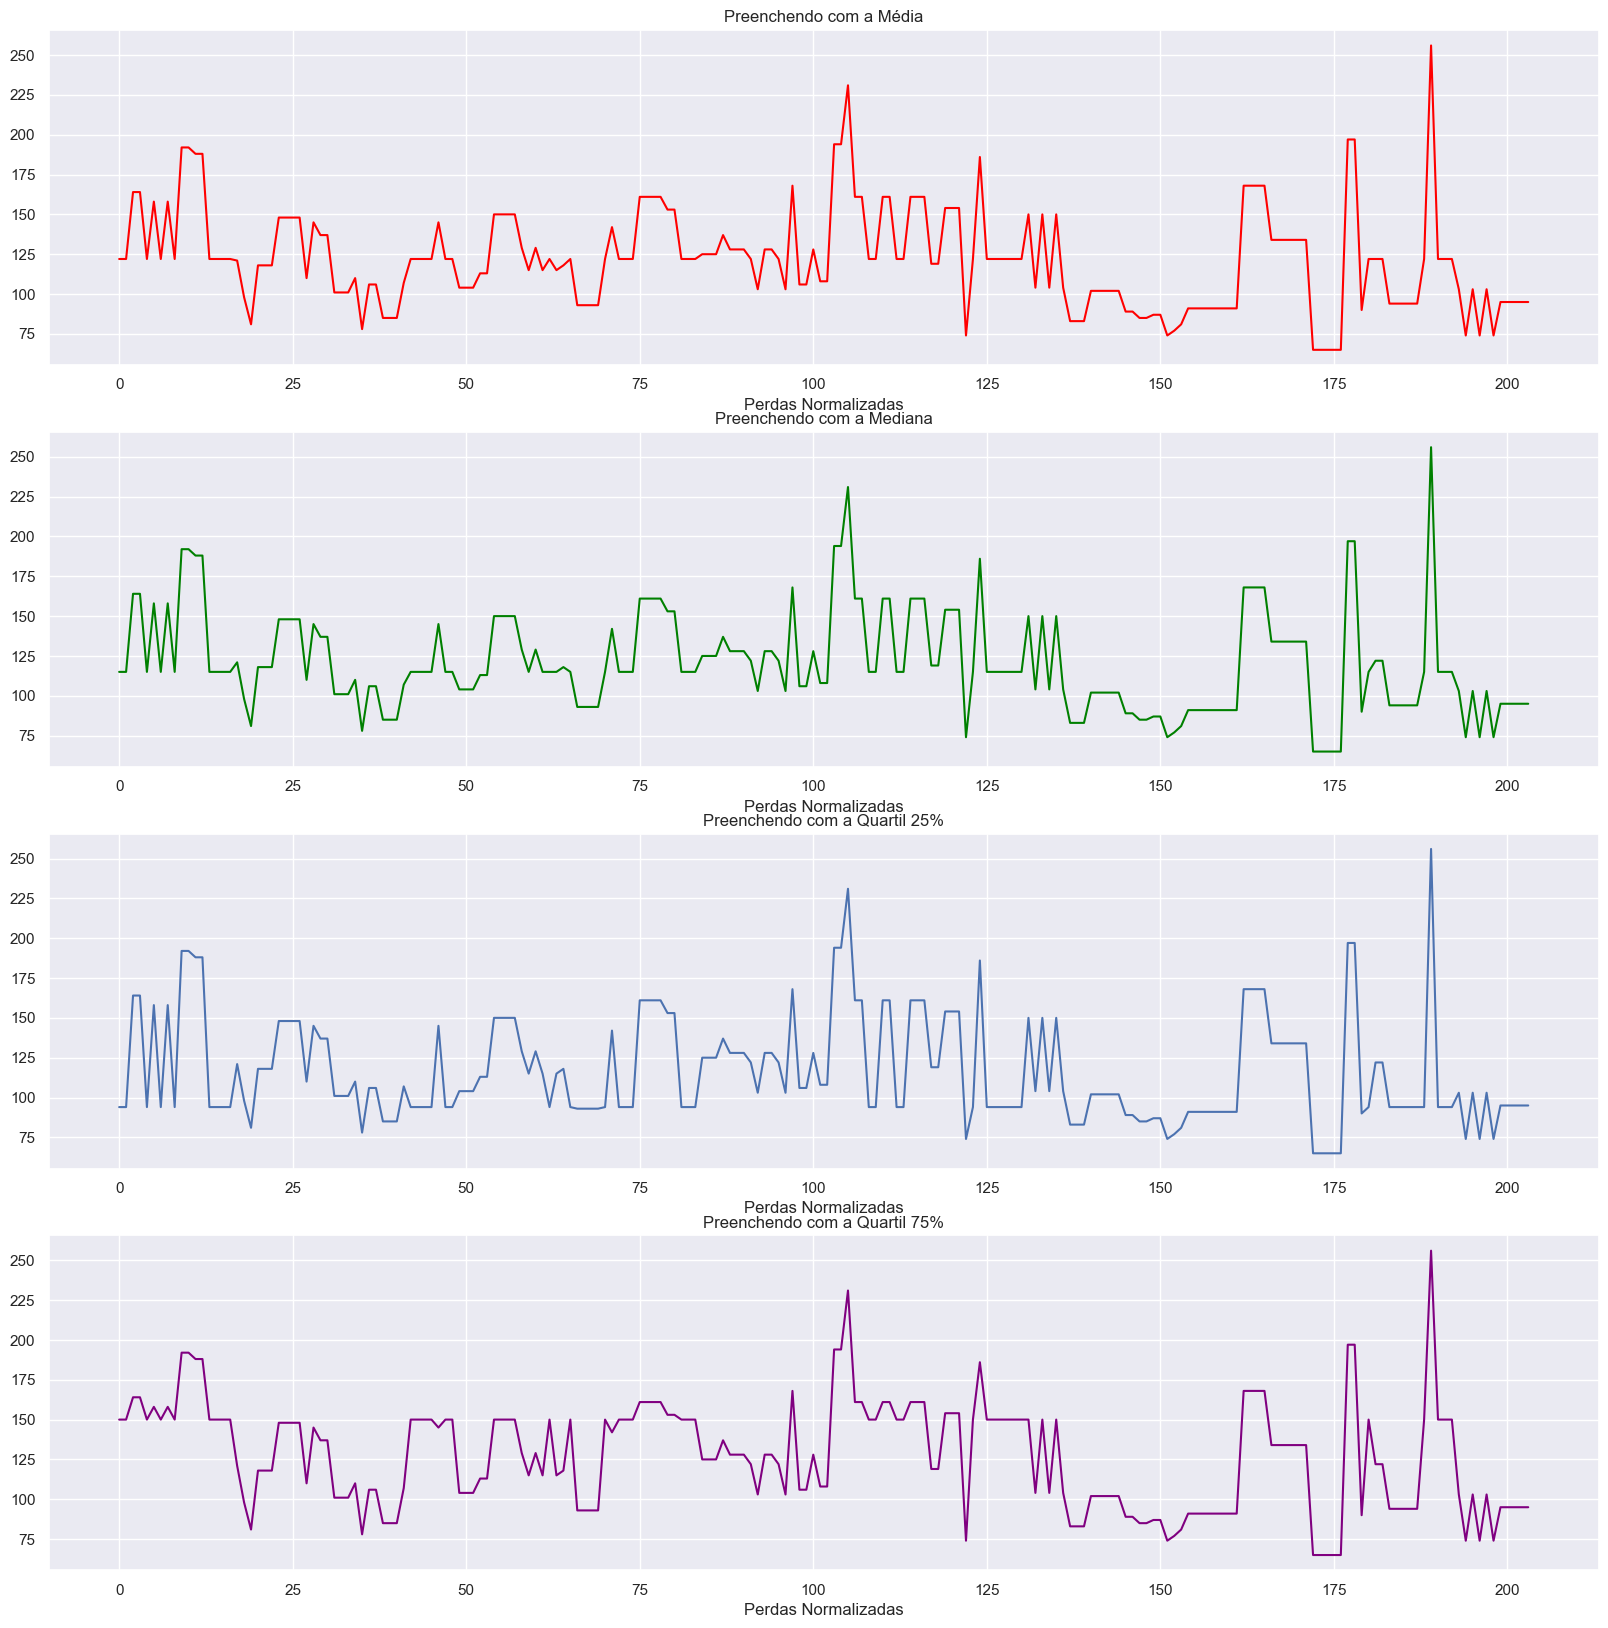

In [12]:
media_dados = perdas_normalizada.fillna(perdas_normalizada.mean())
mediana_dados = perdas_normalizada.fillna(perdas_normalizada.median())
quartis_dados = [perdas_normalizada.fillna(perdas_normalizada.quantile(0.25)),
                                     perdas_normalizada.fillna(perdas_normalizada.quantile(0.75))]

fig, ax = plt.subplots(4,1, figsize=(20, 20))

ax[0].plot(media_dados, color='red')
ax[1].plot(mediana_dados,color='green')
ax[2].plot(quartis_dados[0])
ax[3].plot(quartis_dados[1],color='purple')

ax[0].set(title='Preenchendo com a Média', xlabel='Perdas Normalizadas')
ax[1].set(title='Preenchendo com a Mediana', xlabel='Perdas Normalizadas')
ax[2].set(title='Preenchendo com a Quartil 25%', xlabel='Perdas Normalizadas')
ax[3].set(title='Preenchendo com a Quartil 75%', xlabel='Perdas Normalizadas')

Como pode ser visto nos gráficos acima, a distruibuição dos dados com os quatro tipos de preenchimentos escolhidos, apresentam comportamento similar em uma distruibuição de linha. Contudo o preenhcimento com o quartil 75% parece ter algumas diferenças na sua distribuição que sugerem que ele possa ter uma distruição mais próxima da Normal. Para confirmar essa suspeita, é possível utilizar gráficos Boxplot para analisar essas diferentes séries de dados.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


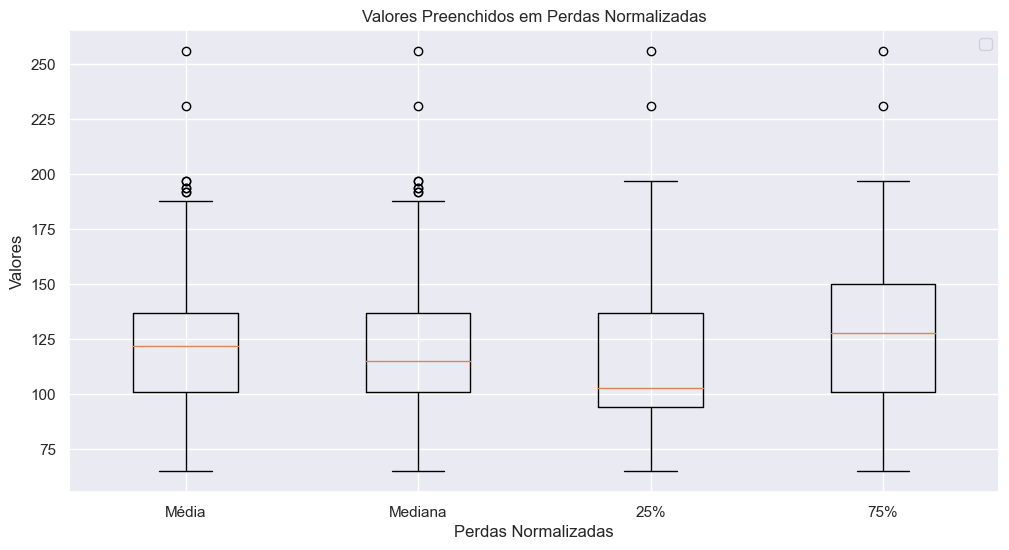

In [13]:
nomes_das_categorias = ['Média','Mediana','25%', '75%']
plt.figure(figsize=(12, 6))

plt.boxplot([media_dados, mediana_dados, quartis_dados[0], quartis_dados[1]])


plt.title('Valores Preenchidos em Perdas Normalizadas')
plt.xlabel('Perdas Normalizadas')
plt.ylabel('Valores')
plt.xticks(range(1, len(nomes_das_categorias) + 1), nomes_das_categorias)

plt.legend()

plt.show()

De acordo com os gráficos acima é notável que a distruição preenchida com o quartil de 75%. Por esse motivo o valor desse desse preenchimento será atribuído para a coluna de **níveis de perda normalizados**

In [14]:
dataset_carros['níveis de perda normalizados'] = quartis_dados[1]

Para continuar a análise dos dados se faz necessário retirar as linhas que possuem valores nulos. 

In [15]:
dataset_carros.dropna(inplace=True)
dataset_carros.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 203
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   marcas                             192 non-null    int64  
 1   níveis de perda normalizados       192 non-null    float64
 2   fabricante                         192 non-null    object 
 3   tipo de combustível                192 non-null    object 
 4   aspiração do motor                 192 non-null    object 
 5   número de portas                   192 non-null    object 
 6   estilo do carro                    192 non-null    object 
 7   tração                             192 non-null    object 
 8   localização do motor               192 non-null    object 
 9   distância entre eixos              192 non-null    float64
 10  comprimento                        192 non-null    float64
 11  largura                            192 non-null    float64

# Escolhendo os melhores parametros para a Análise

Antes de escolher os campos que farão parte da análise de machine learning, deve ser feita uma pergunta: **"Quais são as informações que são mais relavantes que impactam no preço de produção de um carro?"**
A base de dados carregam informações que são relevantes quanto ao preço, tanto para o custo de produção quanto para o consumidor. Contudo, essa análise focará nas informações que mais impactam na indústria. 
- Critério de Escolha ---> Campos referentes ao material que compôe o carro ou que tem uma tecnologia que impacta no preço do veículo.
Os campos escolhidos foram:
<table border="1">
        <tr>
            <td>Marca do carro</td>
            <td>Número de cilindros do motor</td>
            <td>Potência do motor</td>
            <td>Consumo de combustível na cidade</td>
            <td>Consumo de combustível na estrada</td>
            <td>Comprimento do carro</td>
            <td>Largura do carro</td>
            <td>Altura do carro</td>
            <td>Peso do carro</td>
            <td>Tipo de sistema de combustível</td>
            <td>Tipo de motor</td>
            <td>Preço do carro</td>
        </tr>
</table>

Dessa forma, é separado do DataFrame, apenas com essas colunas. Contudo, é possível checar se a hipotése tem fundamento correlacionando as informações do dataset transdormando todos os dados em dados numéricos.

In [16]:
dataset_carros['preço'] = dataset_carros['preço'].astype('float')
for coluna in dataset_carros:
    tipo = dataset_carros[coluna].dtype
    if tipo == 'object':
        target_encoder = ce.TargetEncoder()

        # Ajustar o codificador ao conjunto de treinamento
        target_encoder.fit(dataset_carros[coluna], dataset_carros['preço'])

        # Aplicar o codificador ao conjunto de treinamento e teste
        dataset_carros[coluna] = target_encoder.transform(dataset_carros[coluna], 
                                                              dataset_carros['preço'])
        print(f'______{coluna}_______')
        print(dataset_carros[coluna].unique())

______fabricante_______
[13740.13492089 14188.98736466 16254.87449945 12159.89901624
 12012.25205941 11591.94211233 12664.40737021 16576.52434077
 12219.94570221 17997.47779808 13702.76028007 11942.02953672
 11992.73662061 13921.33448682 12144.4665222  16327.18259114
 13667.57706425 11813.57975335 10672.39301447 12289.85645671
 14665.37674439]
______tipo de combustível_______
[12974.26018578 14623.32313708]
______aspiração do motor_______
[12572.61226339 15892.6342091 ]
______número de portas_______
[12837.21978959 13603.77125509]
______estilo do carro_______
[15160.30061106  9811.10538382 14562.78435763 12814.70148356
 15349.74853413]
______tração_______
[20185.58275923  9231.39664573 12579.56888066]
______localização do motor_______
[12946.72488315 16565.40284169]
______tipo de motor_______
[14802.20273892 17204.11203781 11622.16526698 13700.49840304
 13455.58784235]
______número de cilindros_______
[10299.76868039 19503.04045978 15630.08788471 12225.7688791
 16239.48520472 17586.960

Com esse tratamento concluído, podemos fazer uma breve correlação para entender como as variavéis se relacionam com essa amostra de dados. Contudo, como o objetivo é a tentativa de prever o preço o veículo, será considerado o eixo que se relaciona com o custo final do produção do automóvel. É possível observar no mapa de calor que alguns campos tem uma correlação positiva em relação ao preço.

<AxesSubplot:title={'center':'Correlção Entre As Variáveis'}>

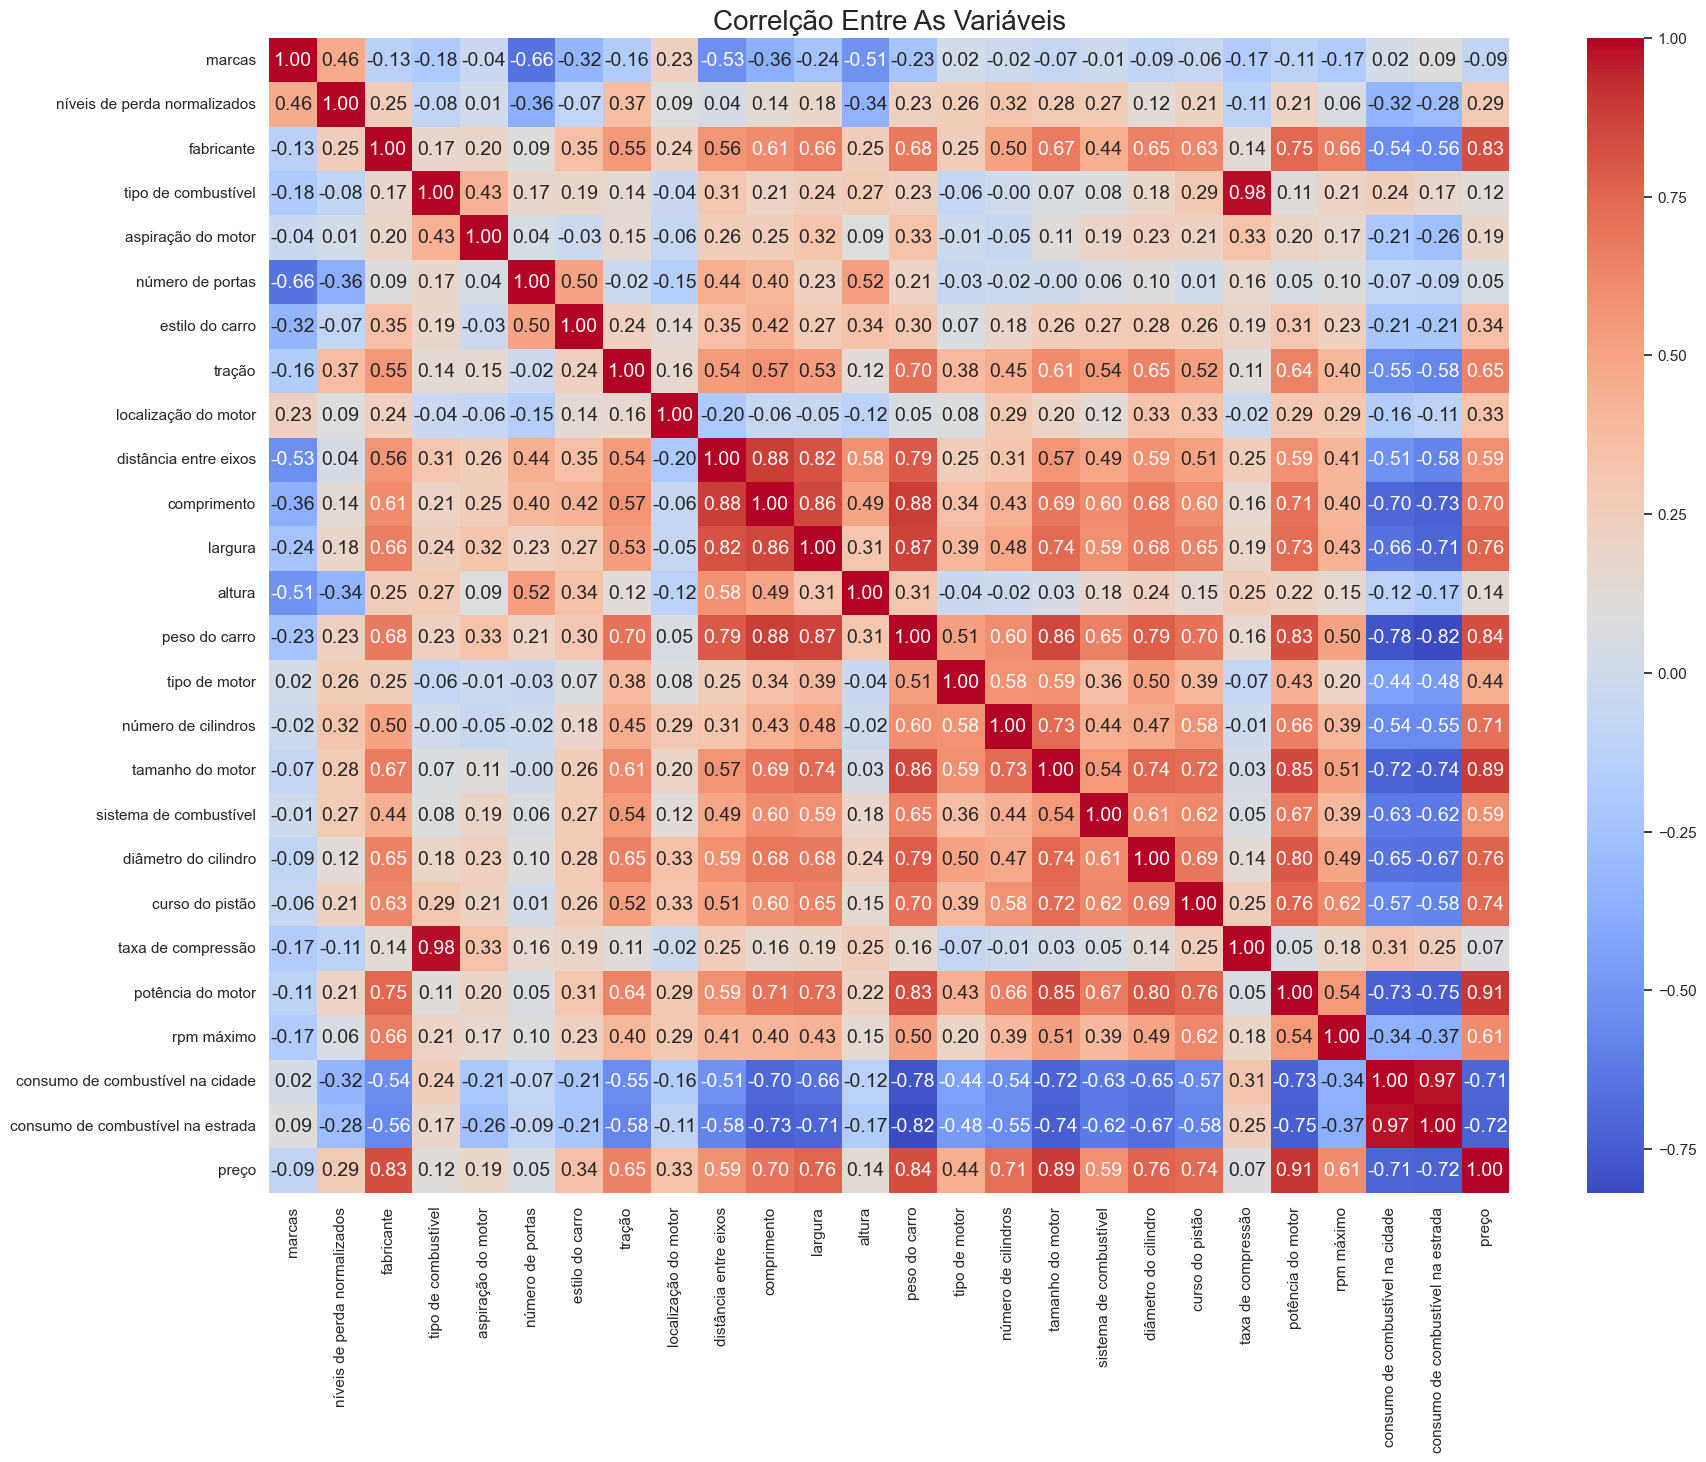

In [17]:
correlacao = dataset_carros.corr()
plt.figure(figsize=(20,15))
plt.title('Correlção Entre As Variáveis', fontsize=20)
sns.heatmap(correlacao, annot=True, fmt='.2f', cmap='coolwarm', annot_kws={'fontsize': 14})

Como próxima etapa para confirmar se os critérios escolhidos pelo programador fazem sentido para a análise, um gráfico de barras foi produzido para ver os quais das colunas possuem correlação positiva com o preço dos automóveis do dataset.

<AxesSubplot:title={'center':'Correlação das variáveis com o Preço'}>

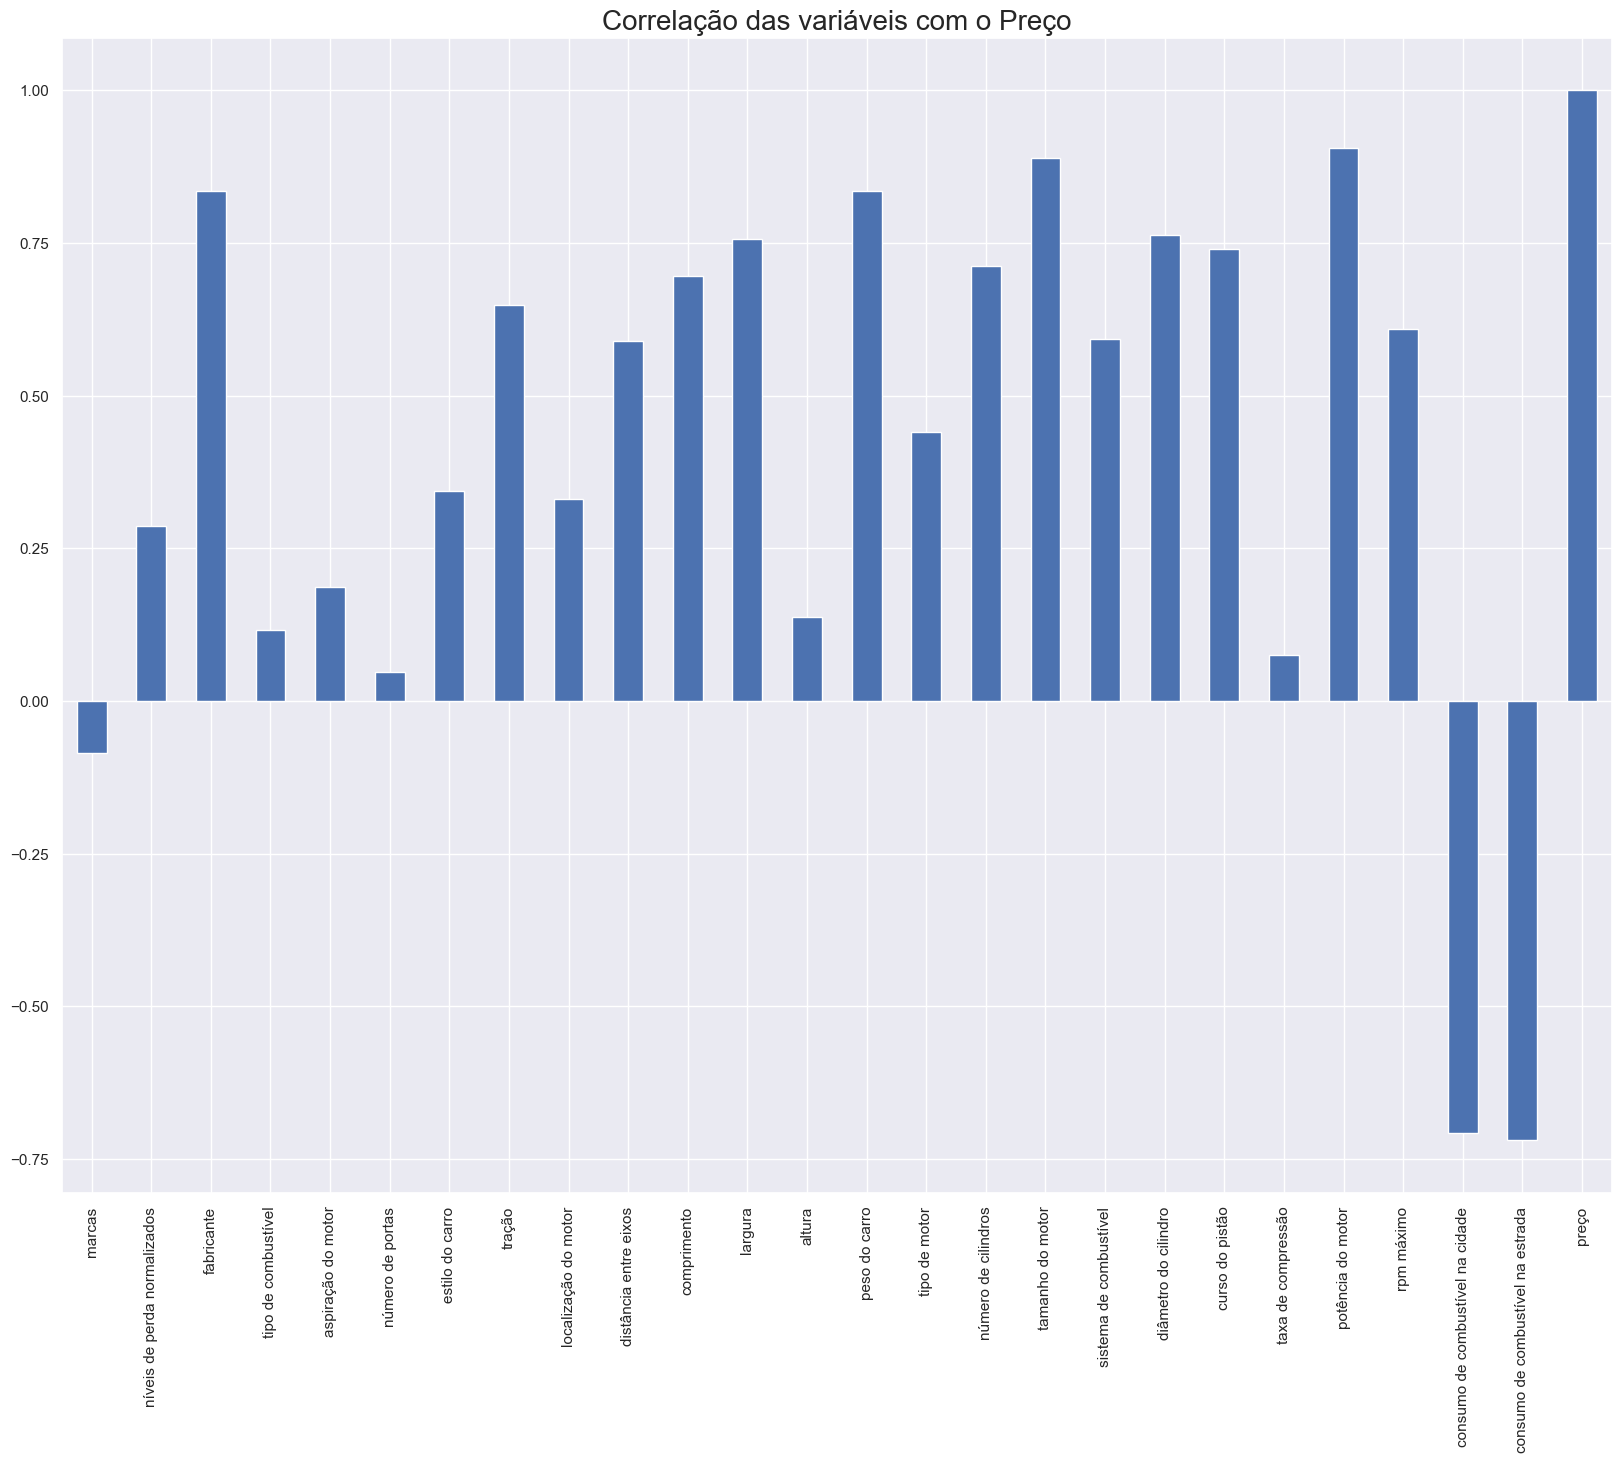

In [18]:
corr_precos = correlacao.iloc[-1,:]
plt.figure(figsize=(20,15))
plt.title('Correlação das variáveis com o Preço', fontsize=20)
corr_precos.plot(kind='bar')

De forma comparativa os campos escolhidos pelo programador e os dados escolhidos pós-análise tem similaridades, contudo os dados escolhidos posteriormente tem mais sentido o critério vinculado ao objetivo da análise como mostra as tabelas abaixo. Por esse motivo vai ser montado um dataset com os campos que possuem corelação positiva acima de 0.5, pois é esperado que resultados positivos para a futura predição de preços.

- Critério de Escolha ---> Campos referentes ao material que compôe o carro ou que tem uma tecnologia que impacta no preço do veículo.
Os campos escolhidos foram:
<table border="1">
        <tr>
            <td>marca</td>
            <td>número de cilindros</td>
            <td>potência do motor</td>
            <td>consumo de combustível na cidade</td>
            <td>consumo de combustível na estrada</td>
            <td>comprimento</td>
            <td>largura</td>
            <td>altura</td>
            <td>peso do carro</td>
            <td>sistema de combustível</td>
            <td>tipo de motor</td>
            <td>preço</td>
        </tr>
</table>
- Critério Pós-análise:
<table border="1">
        <tr>
            <td>fabricante</td>
            <td>tração</td>
            <td>distância entre eixos</td>
            <td>comprimento</td>
            <td>largura</td>
            <td>peso do carro</td>
            <td>número de cilindros</td>
            <td>tamanho do motor</td>
            <td>sistema de combustível</td>
            <td>diâmetro do cilindro</td>
            <td>curso do pistão</td>
            <td>potência do motor</td>
            <td>rpm máximo</td>
            <td>preço</td>
        </tr>
</table>

In [19]:
criterio = []
for i, linha in enumerate(corr_precos):
    if linha >= 0.5:
        criterio.append(corr_precos.index[i])
dataset_carros_filtrada = dataset_carros[criterio]
dataset_carros_filtrada.head()

,fabricante,tração,distância entre eixos,comprimento,largura,peso do carro,número de cilindros,tamanho do motor,sistema de combustível,diâmetro do cilindro,curso do pistão,potência do motor,rpm máximo,preço
0,13740.134921,20185.582759,88.6,168.8,64.1,2548,10299.768680,130,17957.293481,13702.369955,13702.369955,13263.398870,12889.157177,16500.0
1,13740.134921,20185.582759,94.5,171.2,65.5,2823,19503.040460,152,17957.293481,13702.369955,12820.356404,13702.369955,12889.157177,16500.0
2,14188.987365,9231.396646,99.8,176.6,66.2,2337,10299.768680,109,17957.293481,12164.116146,13237.937438,12629.529289,11516.508427,13950.0
3,14188.987365,12579.568881,99.4,176.6,66.4,2824,15630.087885,136,17957.293481,12164.116146,13237.937438,13825.973005,11516.508427,17450.0
4,14188.987365,9231.396646,99.8,177.3,66.3,2507,15630.087885,136,17957.293481,12164.116146,13237.937438,13673.781163,11516.508427,15250.0


# Iniciando o Algoritmos de Machine Learning

In [20]:
dataset_carros_filtrada.iloc[:,13]

0      16500.0
1      16500.0
2      13950.0
3      17450.0
4      15250.0
        ...   
199    16845.0
200    19045.0
201    21485.0
202    22470.0
203    22625.0
Name: preço, Length: 192, dtype: float64

In [21]:
X = dataset_carros_filtrada.iloc[:,0:len(dataset_carros_filtrada.columns)-1]
y = dataset_carros_filtrada.iloc[:,len(dataset_carros_filtrada.columns)-1]

# Normalizar os atributos usando MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Dividir os dados em conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

dicionario_de_resultados = {'3':[],
                           '5':[],
                           '7':[],
                            '9':[]}
ks = [3,5,7,9]
for k in ks:
    i_k = k
    knn = KNeighborsRegressor(n_neighbors=i_k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    dicionario_de_resultados[f'{k}'].append((rmse, r2))

In [22]:
resultados_knn = pd.DataFrame(dicionario_de_resultados)
resultados_knn

,3,5,7,9
0,"(2428.794791578972, 0.9088302427416222)","(2194.6975246296206, 0.9255579198319105)","(2013.7666548636441, 0.9373259956737178)","(2181.5041477450095, 0.9264502435756111)"


# Analisando os resultados gráficamente

Os resultados aprensentado para os diferentes valores de **K** no DataFrame acima demonstra que os resultados de R² e RMSE (Root Mean Square Root) são promissores e fazem sentido para a análise. Contudo, uma refinamento da escolha dos campos para ser utilizados para o aprendizado de Máquina será realizado com o fim de confirmar que não seja necessário tantas colunas do dataset para análise. Para que esse objetivo seja alcançado serão escolhidas primeiramente dois campos, em seguida três, até cinco campos. Para cumprir esse objetivo será utilizado como critério o valor de correlação maior que **0.76**, que nos gera 5 campos de correlação positiva com o preço dos veículos e o código abaixo faz essa filtragem e em seguida mostra o dataframe como resultado.

In [23]:
criterio = []
for i, linha in enumerate(corr_precos):
    if linha > 0.76:
        criterio.append(corr_precos.index[i])
dataset_carros_filtrada = dataset_carros[criterio]
dataset_carros_filtrada.head()

,fabricante,peso do carro,tamanho do motor,diâmetro do cilindro,potência do motor,preço
0,13740.134921,2548,130,13702.369955,13263.398870,16500.0
1,13740.134921,2823,152,13702.369955,13702.369955,16500.0
2,14188.987365,2337,109,12164.116146,12629.529289,13950.0
3,14188.987365,2824,136,12164.116146,13825.973005,17450.0
4,14188.987365,2507,136,12164.116146,13673.781163,15250.0


Nesse momento será preparado o algoritmo KNN (K-Nearest Neighbors) para a quantidade de campos para análise. Começando pelas relações com a coluna de preço que possuem maior correlação positiva das colunas escolhidas. Contudo, antes de prosseguir com o procedimento, fazer uma função para que o código não fique muito extenso e seja de fácil manutenção se faz necessário. Essa função vai utilizar uma função como parâmetro e vai utlizar do algoritmo de machine learning escolhido e repetir o processo com diferentes valores de **K**.

In [24]:
def knn_train_test(dataset):
    X = dataset.iloc[:,0:len(dataset.columns)-1]
    y = dataset.iloc[:,len(dataset.columns)-1]

    # Normalizar os atributos usando MinMaxScaler
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)

    # Dividir os dados em conjunto de treinamento e conjunto de teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

    dicionario_de_resultados = {'3':[],
                               '5':[],
                               '7':[],
                                '9':[]}
    ks = [3,5,7,9]
    for k in ks:
        i_k = k
        knn = KNeighborsRegressor(n_neighbors=i_k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        dicionario_de_resultados[f'{k}'].append((rmse, r2))
    data = pd.DataFrame(dicionario_de_resultados)
    return data

Com a função elaborada, é o momento de separar as colunas com o critério de correlação estabelecido anteriormente e começando com dataset com apenas duas colunas de características e seguir até completar coluna para a análise e escolher o melhor valor de **R²** e **RMSE**(Root Mean Square Error), sendo o maior e menor respectivamente. 

In [25]:
dataset_carros_filtrada_2 = dataset_carros_filtrada[['potência do motor', 
                                                     'tamanho do motor', 
                                                     'preço']]
dataset_carros_filtrada_3 = dataset_carros_filtrada[['potência do motor', 
                                                     'tamanho do motor', 
                                                     'peso do carro',
                                                     'preço']]
dataset_carros_filtrada_4 = dataset_carros_filtrada[['potência do motor', 
                                                     'tamanho do motor', 
                                                     'peso do carro',
                                                     'diâmetro do cilindro',
                                                     'preço']]
lista_de_dataset_carros = [dataset_carros_filtrada_2, 
                           dataset_carros_filtrada_3,
                           dataset_carros_filtrada_4,
                           dataset_carros_filtrada]

lista_de_resultados = []
for dataset in lista_de_dataset_carros:
    lista_de_resultados.append(knn_train_test(dataset))

In [26]:
lista_de_resultados[0]

,3,5,7,9
0,"(1834.3174631332374, 0.947998226656257)","(1598.747011624881, 0.9604971304953375)","(1718.5755087202913, 0.9543536149421633)","(1977.420318540296, 0.939567976360364)"


[Text(0.5, 1.0, 'Resultado de R² para Duas Colunas'),
 Text(0.5, 0, 'Valor de K')]

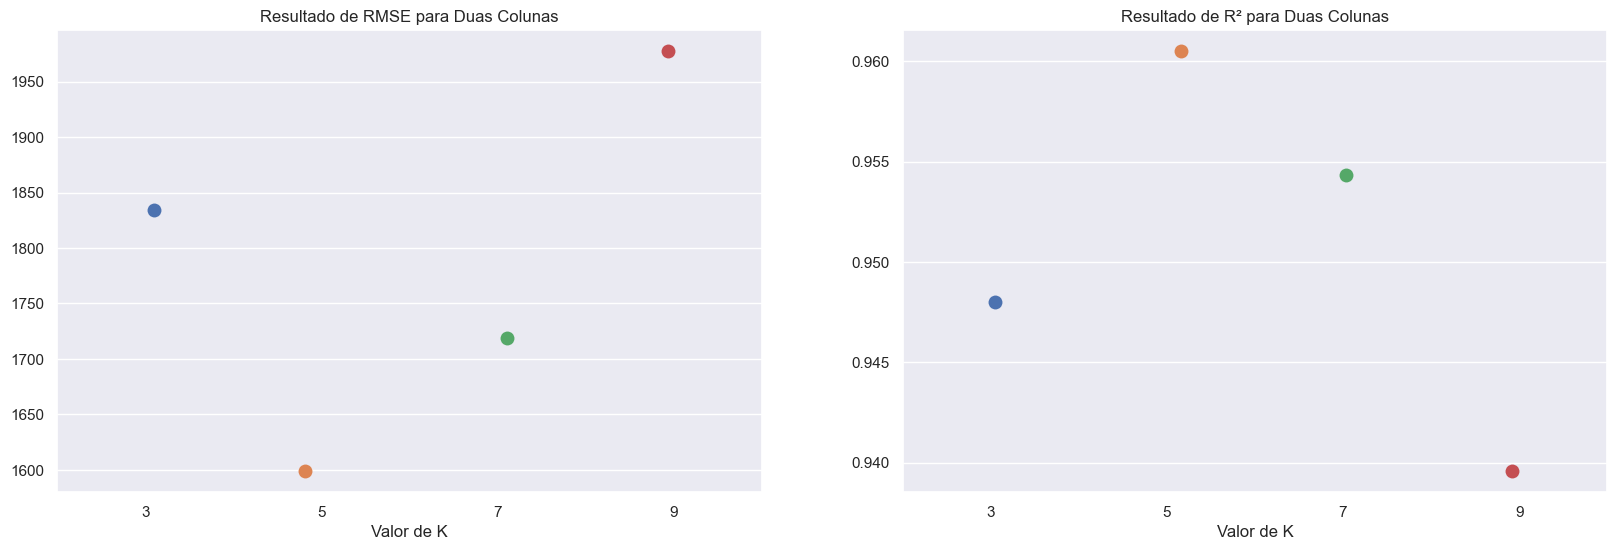

In [61]:
resultados_2_rmse = [list(lista_de_resultados[0][tupla].values)[0][0] for tupla in lista_de_resultados[0]]
resultados_2_r2 = [list(lista_de_resultados[0][tupla].values)[0][1] for tupla in lista_de_resultados[0]]

fig, ax = plt.subplots(1,2, figsize=(20, 6))

sns.stripplot(x=ks, y=resultados_2_rmse, jitter=True, ax=ax[0], size=10)
sns.stripplot(x=ks, y=resultados_2_r2, jitter=True, ax=ax[1], size=10)

ax[0].set(title='Resultado de RMSE para Duas Colunas', xlabel='Valor de K')
ax[1].set(title='Resultado de R² para Duas Colunas', xlabel='Valor de K')

In [27]:
lista_de_resultados[1]

,3,5,7,9
0,"(1692.2724434298466, 0.9557401724145198)","(1562.894990648723, 0.9622489747253159)","(1706.9789772214783, 0.9549675580726628)","(1907.0361601481743, 0.9437934396665055)"


[Text(0.5, 1.0, 'Resultado de R² para Três Colunas'),
 Text(0.5, 0, 'Valor de K')]

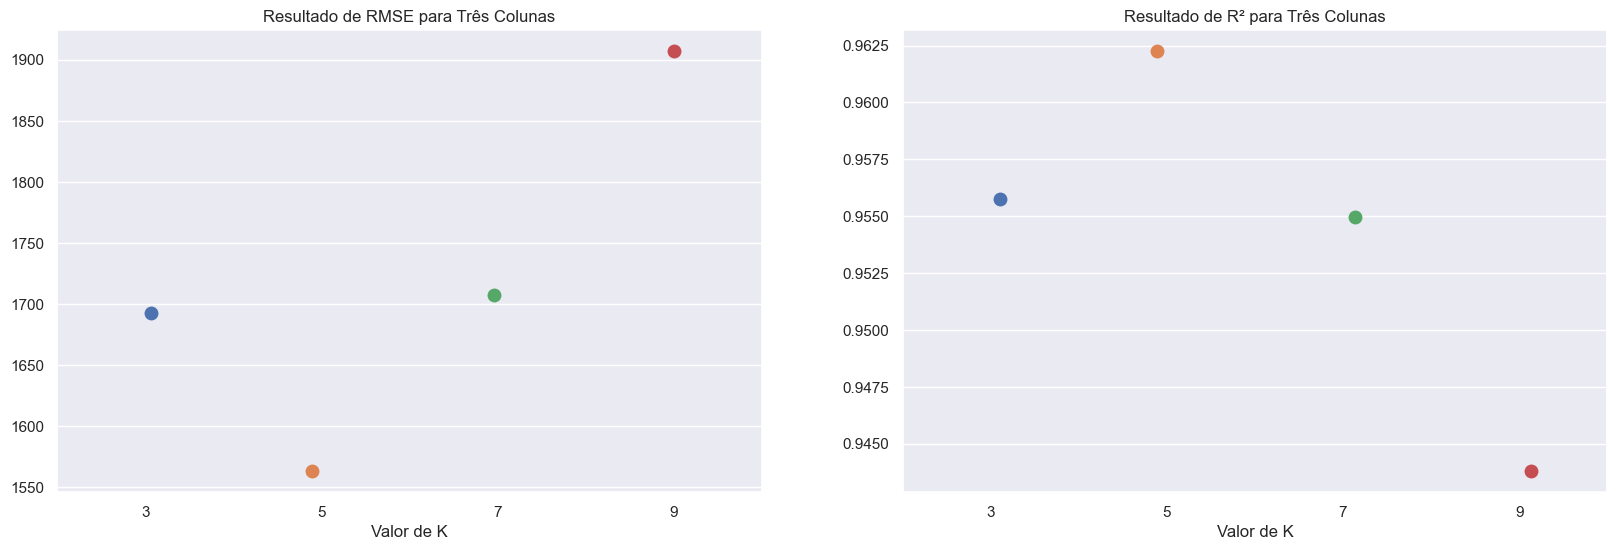

In [58]:
resultados_3_rmse = [list(lista_de_resultados[1][tupla].values)[0][0] for tupla in lista_de_resultados[1]]
resultados_3_r2 = [list(lista_de_resultados[1][tupla].values)[0][1] for tupla in lista_de_resultados[1]]

fig, ax = plt.subplots(1,2, figsize=(20, 6))

sns.stripplot(x=ks, y=resultados_3_rmse, jitter=True, ax=ax[0], size=10)
sns.stripplot(x=ks, y=resultados_3_r2, jitter=True, ax=ax[1], size=10)

ax[0].set(title='Resultado de RMSE para Três Colunas', xlabel='Valor de K')
ax[1].set(title='Resultado de R² para Três Colunas', xlabel='Valor de K')

In [28]:
lista_de_resultados[2]

,3,5,7,9
0,"(1972.144731835076, 0.9398900010638377)","(2016.6827646740408, 0.9371443493963383)","(2160.14184588617, 0.9278836574690463)","(2206.218482544106, 0.9247743082923184)"


[Text(0.5, 1.0, 'Resultado de R² para Quatro Colunas'),
 Text(0.5, 0, 'Valor de K')]

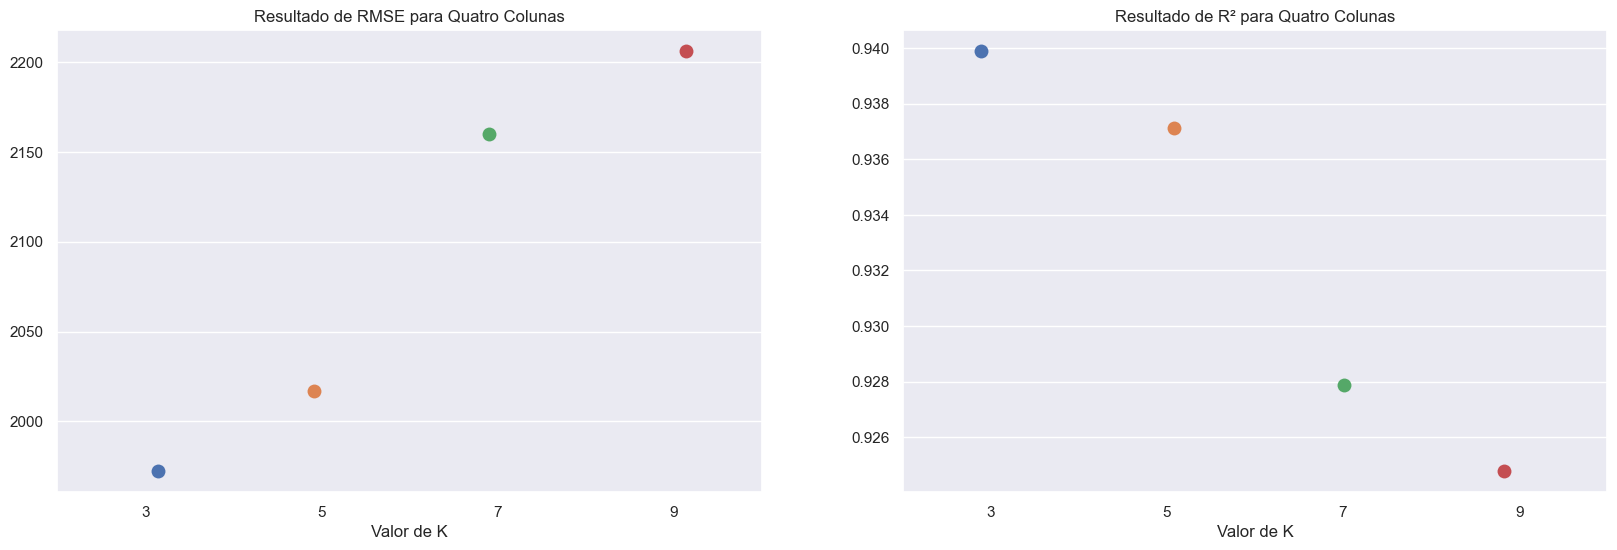

In [62]:
resultados_4_rmse = [list(lista_de_resultados[2][tupla].values)[0][0] for tupla in lista_de_resultados[2]]
resultados_4_r2 = [list(lista_de_resultados[2][tupla].values)[0][1] for tupla in lista_de_resultados[2]]

fig, ax = plt.subplots(1,2, figsize=(20, 6))

sns.stripplot(x=ks, y=resultados_4_rmse, jitter=True, ax=ax[0], size=10)
sns.stripplot(x=ks, y=resultados_4_r2, jitter=True, ax=ax[1], size=10)

ax[0].set(title='Resultado de RMSE para Quatro Colunas', xlabel='Valor de K')
ax[1].set(title='Resultado de R² para Quatro Colunas', xlabel='Valor de K')

In [29]:
lista_de_resultados[3]

,3,5,7,9
0,"(1893.202897427059, 0.9446059047297753)","(2311.8356968501826, 0.9173994225564389)","(2272.712769650695, 0.9201714470444444)","(2219.700022510592, 0.9238521360001068)"


[Text(0.5, 1.0, 'Resultado de R² para Quatro Colunas'),
 Text(0.5, 0, 'Valor de K')]

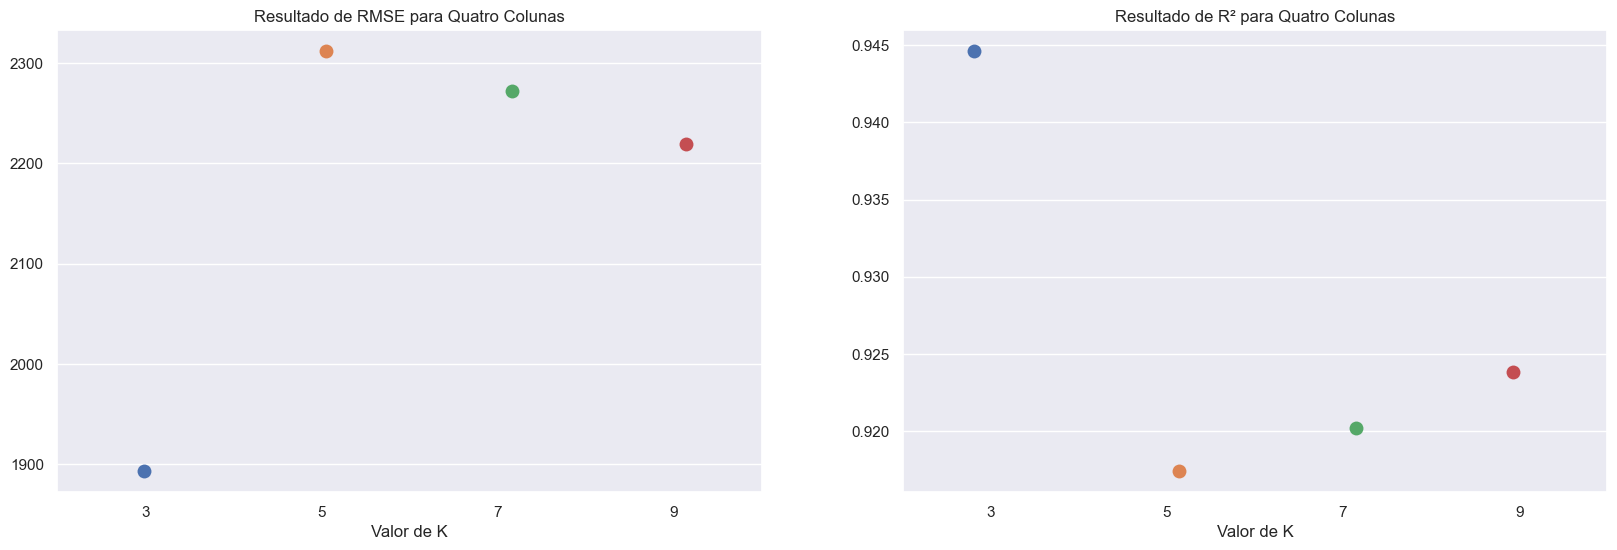

In [64]:
resultados_5_rmse = [list(lista_de_resultados[3][tupla].values)[0][0] for tupla in lista_de_resultados[3]]
resultados_5_r2 = [list(lista_de_resultados[3][tupla].values)[0][1] for tupla in lista_de_resultados[3]]

fig, ax = plt.subplots(1,2, figsize=(20, 6))

sns.stripplot(x=ks, y=resultados_5_rmse, jitter=True, ax=ax[0], size=10)
sns.stripplot(x=ks, y=resultados_5_r2, jitter=True, ax=ax[1], size=10)

ax[0].set(title='Resultado de RMSE para Quatro Colunas', xlabel='Valor de K')
ax[1].set(title='Resultado de R² para Quatro Colunas', xlabel='Valor de K')

Em resumo, o valor de k=5 parece ser a melhor escolha e com apenas três colunas, pois resultou no menor RMSE e um alto valor de R², indicando que o modelo está fazendo boas previsões e explicando bem os dados. No entanto, o mesmo valor de k=5 para duas colunas de análise tem valores similares de RMSE e R² ao melhor resultado previsto por essa análise. 

# Concluindo

A análise exploratória e o algoritmo de Machine Learning foram efetivados com sucesso. Como perspectiva para o próximo passo desse projeto é delinear design e estrutura para ser integrado para aplicação web. Além disso, fica o convite para possíveis críticas e sugestões para o desenvolvimento e melhor performance dessa presente análise. 